****Проектная работа по модулю “Математика и статистика в Python”****

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

1.Загрузить файл hr.csv.

In [4]:
data = pd.read_csv('hr.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [11]:
corr_matrix = hr.corr().round(4)
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.0000,0.1050,-0.1430,-0.0200,-0.1009,0.0587,-0.3884,0.0256
last_evaluation,0.1050,1.0000,0.3493,0.3397,0.1316,-0.0071,0.0066,-0.0087
number_project,-0.1430,0.3493,1.0000,0.4172,0.1968,-0.0047,0.0238,-0.0061
average_montly_hours,-0.0200,0.3397,0.4172,1.0000,0.1278,-0.0101,0.0713,-0.0035
time_spend_company,-0.1009,0.1316,0.1968,0.1278,1.0000,0.0021,0.1448,0.0674
Work_accident,0.0587,-0.0071,-0.0047,-0.0101,0.0021,1.0000,-0.1546,0.0392
left,-0.3884,0.0066,0.0238,0.0713,0.1448,-0.1546,1.0000,-0.0618
promotion_last_5years,0.0256,-0.0087,-0.0061,-0.0035,0.0674,0.0392,-0.0618,1.0000


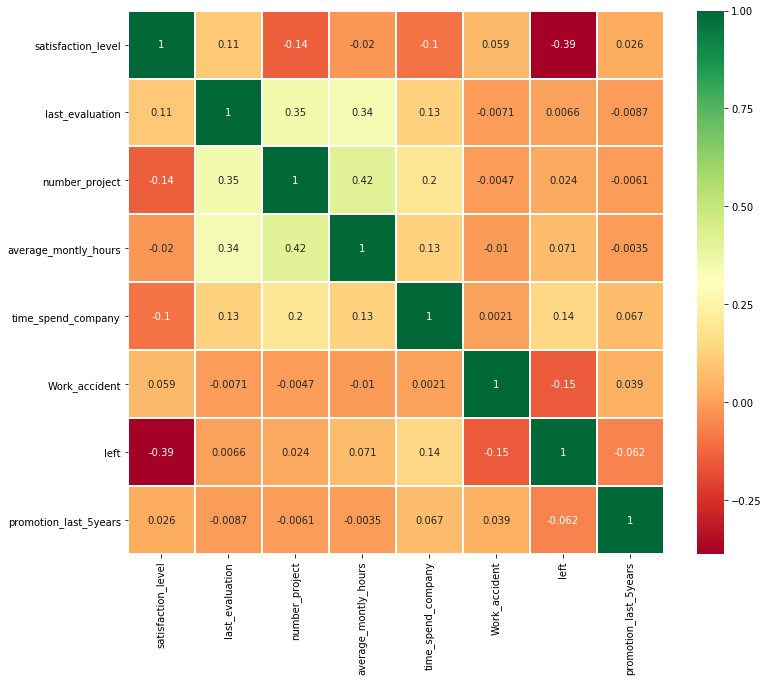

In [12]:
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',linewidths=1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()


4.Визуализировать несколько взаимосвязей между переменными.

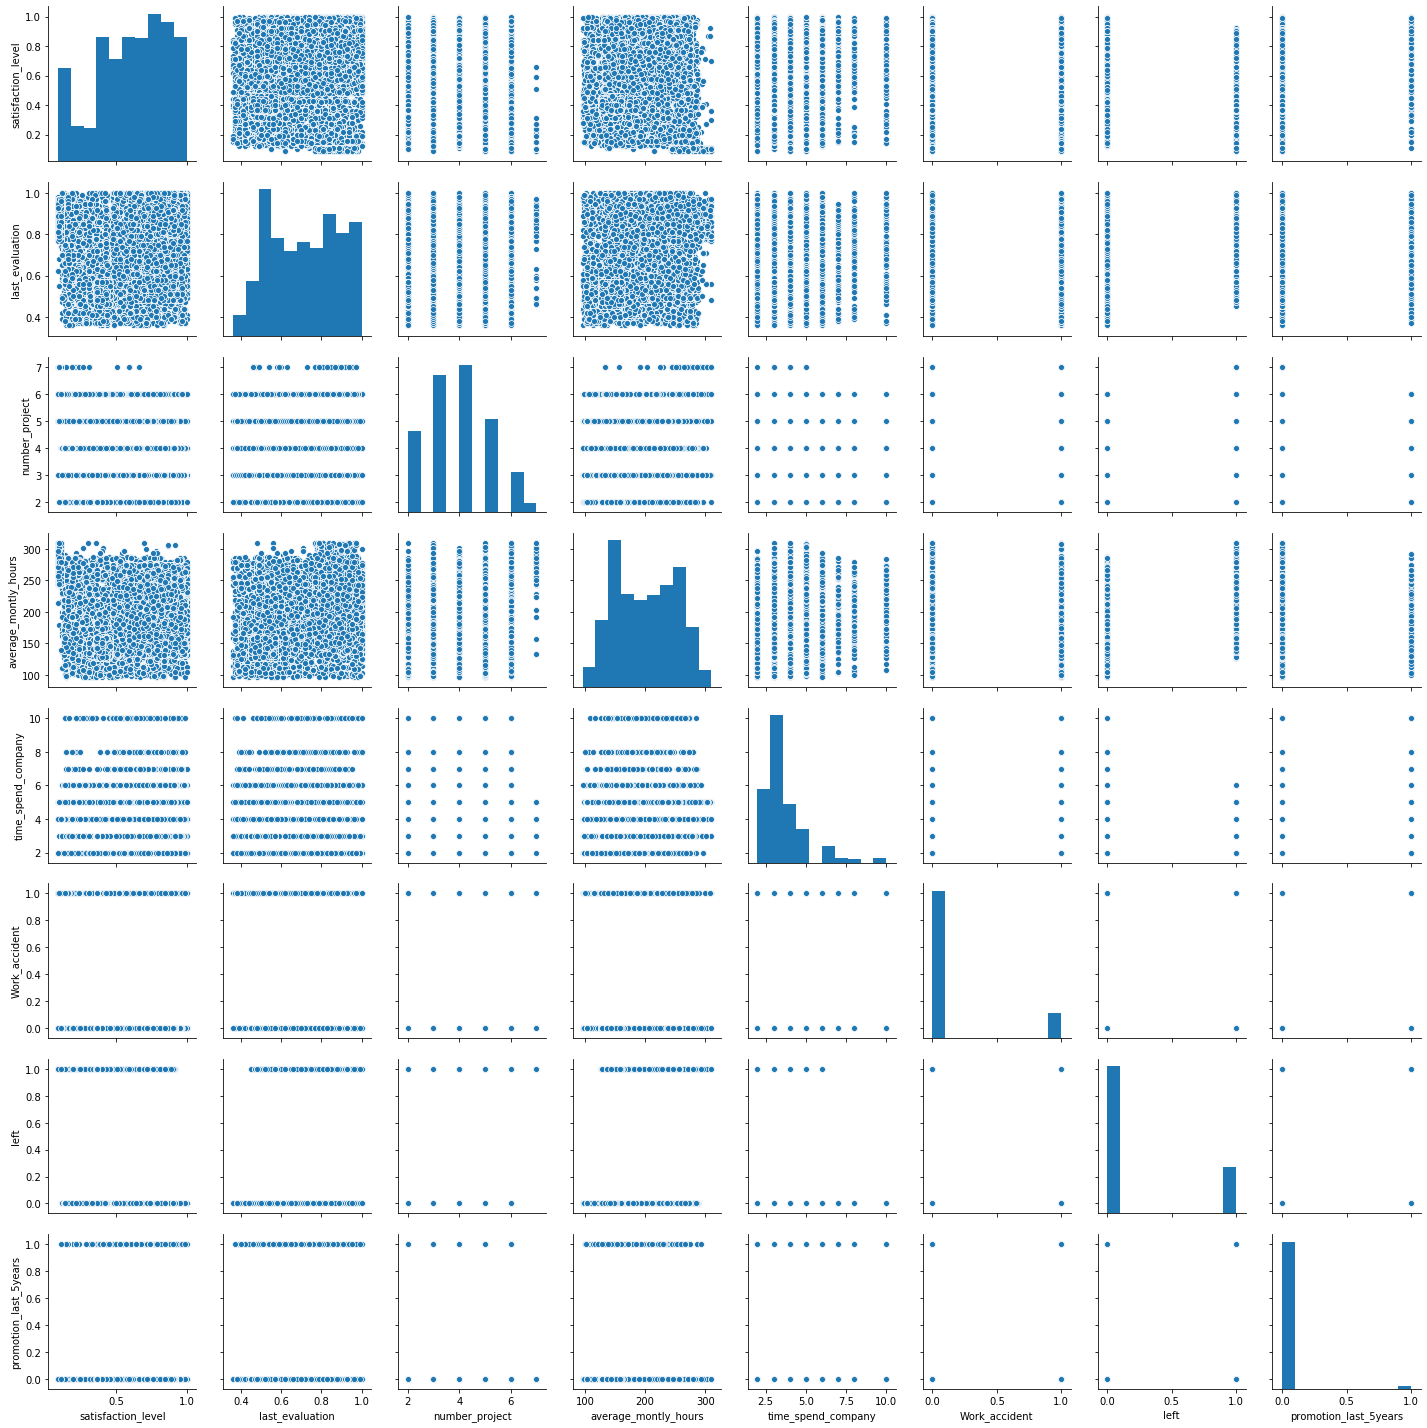

In [13]:
sns.pairplot(data)

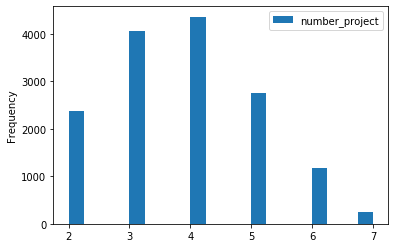

In [15]:
data.plot.hist(y='number_project', bins = 20)

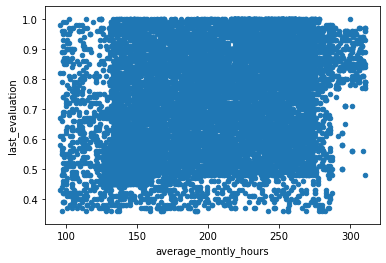

In [16]:
data.plot.scatter(x='average_montly_hours', y='last_evaluation')

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [19]:
x = data['satisfaction_level']
y = data['number_project']

stats.ttest_ind(x,y)

Ttest_indResult(statistic=-310.721972689063, pvalue=0.0)

In [20]:
a = data['average_montly_hours']
b = data['number_project']

stats.ttest_ind(x,y)

Ttest_indResult(statistic=-310.721972689063, pvalue=0.0)

p-значение меньше 0,05 нулевая гипотеза о взаимосвязи отвергается

6.Рассчитать сколько работников работает в каждом департаменте.

In [24]:
data.groupby('sales').count()['salary']

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64

7.Показать распределение сотрудников по зарплатам.

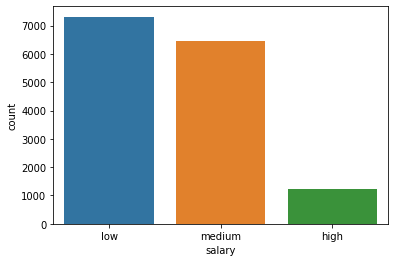

In [26]:
sns.countplot(x="salary", data=data)

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

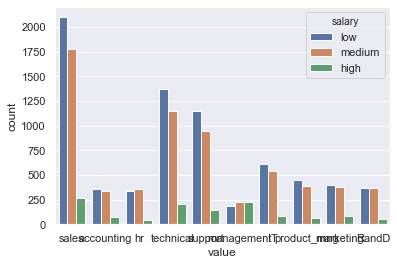

In [46]:
sns.countplot(x="value", hue="salary", data=pd.melt(data, col_level=0, id_vars=['salary'], value_vars=['sales']))

9.Сколько сотрудников покинули компанию.

In [50]:
data.groupby("left").count()["salary"][1]

3571

Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [51]:
test_1 = data[data['left'] == 1]
test_2 = data[data['left'] != 1]

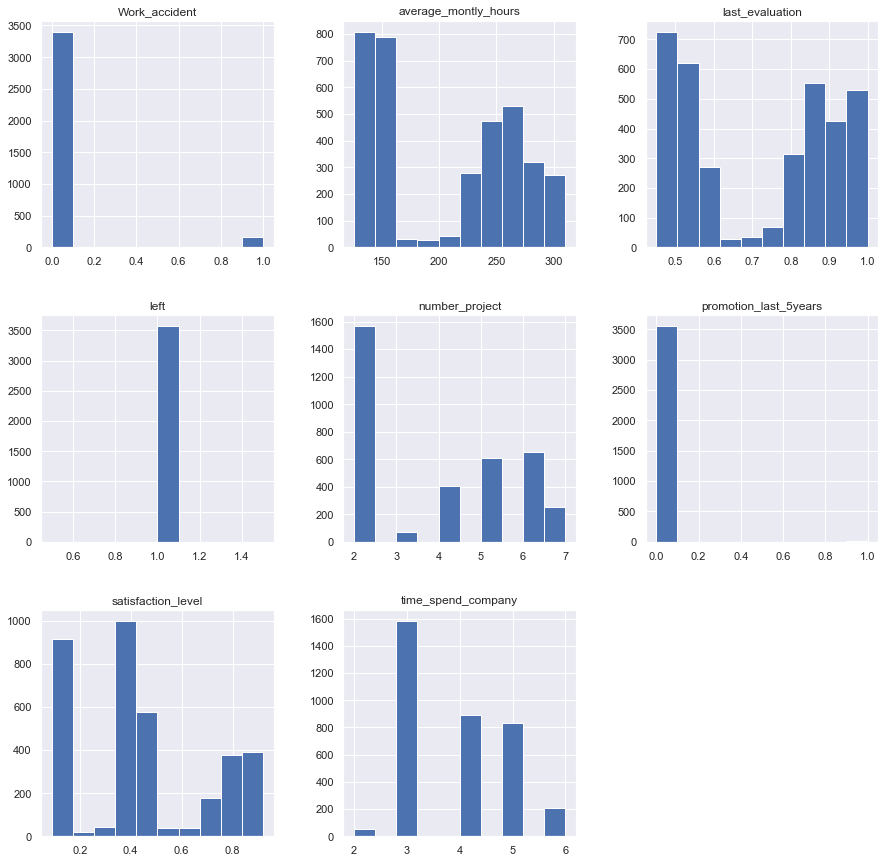

In [54]:
test_1.hist(figsize=(15,15))
plt.show()

Сотрудники покидают работу из-за выскокой нагрузки

In [56]:
test_1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000
